In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [2]:
df_train = pd.read_csv(r"C:\Users\cd\Desktop\Machine Learning\House Prices\train.csv")
df_test = pd.read_csv(r"C:\Users\cd\Desktop\Machine Learning\House Prices\test.csv")

In [3]:
# Data Exploration
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

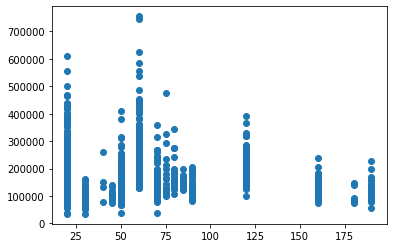

In [5]:
# Visualizing the Data
# Checking Outliers
plt.scatter(x = 'MSSubClass', y = 'SalePrice', data = df_train) # MSSubClass is the buidling type

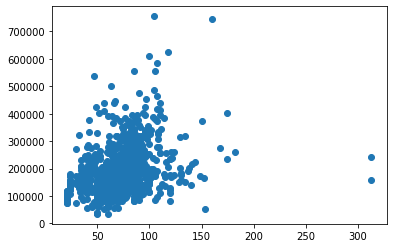

In [6]:
plt.scatter(x = 'LotFrontage', y = 'SalePrice', data = df_train) # 300 outlier

In [7]:
df_train.query('LotFrontage > 300') # We will be dropping id 935 adn 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


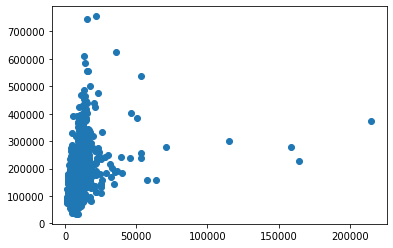

In [8]:
plt.scatter(x = 'LotArea', y = 'SalePrice', data = df_train)

In [9]:
df_train.query('LotArea > 55000') # We will drop id 250, 314, 336, 707

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [10]:
stats.zscore(df_train['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

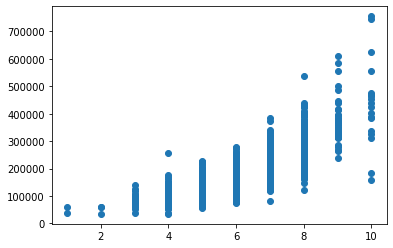

In [11]:
plt.scatter(x = 'OverallQual', y = 'SalePrice', data = df_train)

In [12]:
df_train.query('OverallQual == 10') # We will drop id 524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


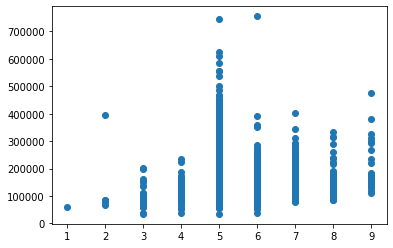

In [13]:
plt.scatter(x = 'OverallCond', y = 'SalePrice', data = df_train)

In [14]:
df_train.query('OverallCond == 2') # We will drop id 379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [15]:
df_train.query('OverallCond == 5 & SalePrice > 700000') # We will drop id 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [16]:
df_train.query('OverallCond == 6 & SalePrice > 700000') # We will drop 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


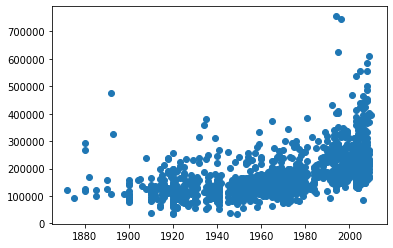

In [17]:
plt.scatter(x = 'YearBuilt', y = 'SalePrice', data = df_train)

In [18]:
df_train.query('YearBuilt < 1900 & SalePrice > 400000') # We will drop id 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


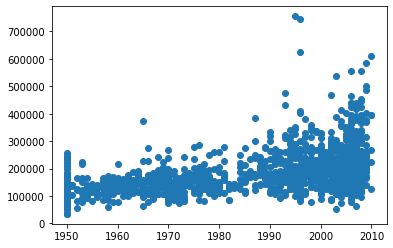

In [19]:
plt.scatter(x = 'YearRemodAdd', y = 'SalePrice', data = df_train)

In [20]:
df_train.query('YearRemodAdd < 1970 & SalePrice > 300000') # We will drop id 314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


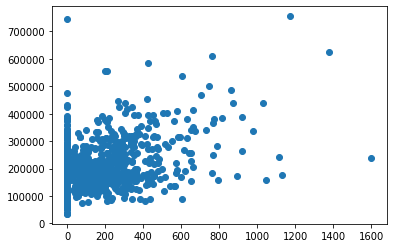

In [21]:
plt.scatter(x = 'MasVnrArea', y = 'SalePrice', data = df_train)

In [22]:
df_train.query('MasVnrArea > 1500') # We will drop id 298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


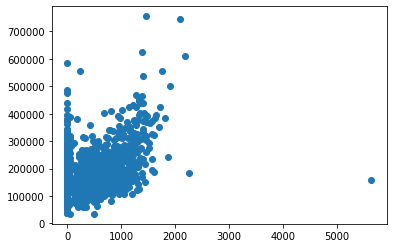

In [23]:
plt.scatter(x = 'BsmtFinSF1', y = 'SalePrice', data = df_train)

In [24]:
df_train.query('BsmtFinSF1 > 5000') # We will drop id 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


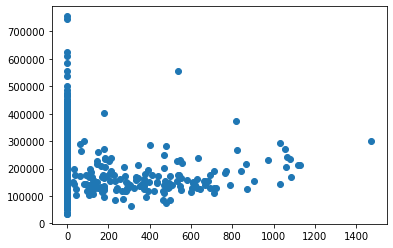

In [25]:
plt.scatter(x = 'BsmtFinSF2', y = 'SalePrice', data = df_train)

In [26]:
df_train.query('BsmtFinSF2 > 500 & SalePrice > 500000') # We will drop id 441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


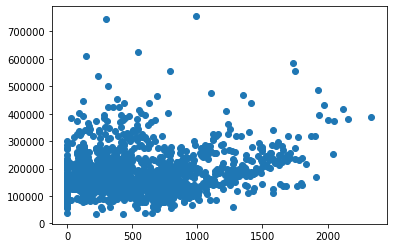

In [27]:
plt.scatter(x = 'BsmtUnfSF', y = 'SalePrice', data = df_train)

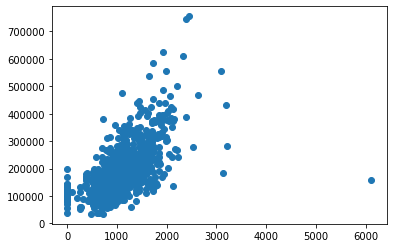

In [28]:
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df_train)

In [29]:
df_train.query('TotalBsmtSF > 5000') # We will drop id 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


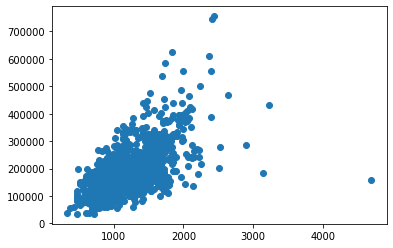

In [30]:
plt.scatter(x = '1stFlrSF', y = 'SalePrice', data = df_train)

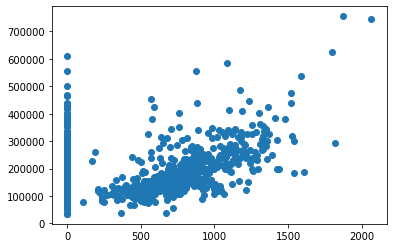

In [31]:
plt.scatter(x = '2ndFlrSF', y = 'SalePrice', data = df_train)

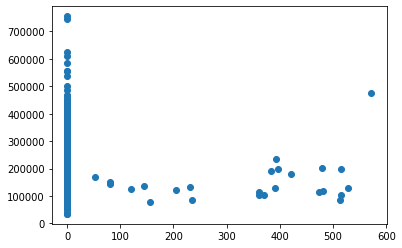

In [32]:
plt.scatter(x = 'LowQualFinSF', y = 'SalePrice', data = df_train)

In [33]:
df_train.query('LowQualFinSF > 500 & SalePrice > 400000') # We will drop id 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


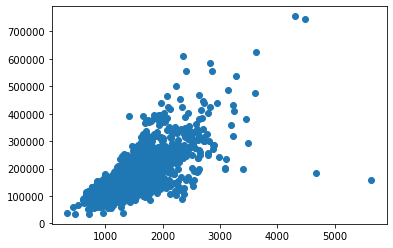

In [34]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df_train)

In [35]:
df_train.query('GrLivArea > 4400') # We will drop id 524 adn 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


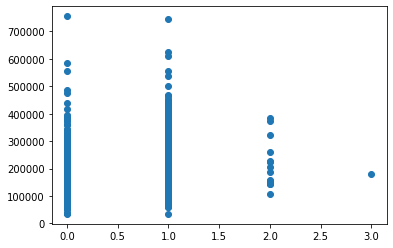

In [36]:
plt.scatter(x = 'BsmtFullBath', y = 'SalePrice', data = df_train)

In [37]:
df_train.query('BsmtFullBath == 3') # We will drop id 739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


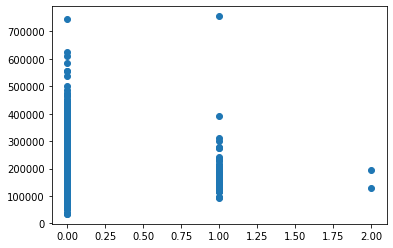

In [38]:
plt.scatter(x = 'BsmtHalfBath', y = 'SalePrice', data = df_train)

In [39]:
df_train.query('BsmtHalfBath == 2') # We will drop id 598 and 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


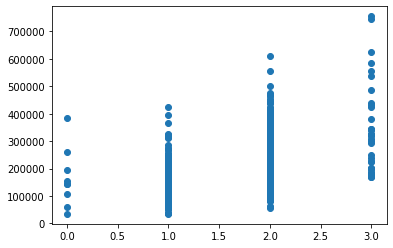

In [40]:
plt.scatter(x = 'FullBath', y = 'SalePrice', data = df_train)

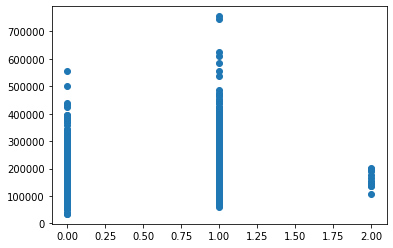

In [41]:
plt.scatter(x = 'HalfBath', y = 'SalePrice', data = df_train)

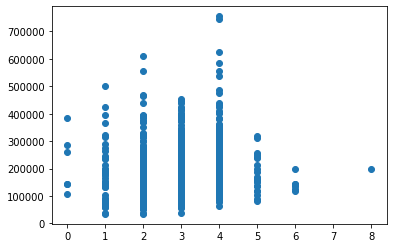

In [42]:
plt.scatter(x = 'BedroomAbvGr', y = 'SalePrice', data = df_train)

In [43]:
df_train.query('BedroomAbvGr == 8') # We will drop id 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


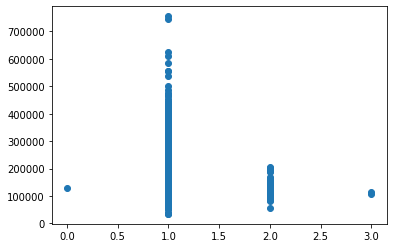

In [44]:
plt.scatter(x = 'KitchenAbvGr', y = 'SalePrice', data = df_train)

In [45]:
df_train.query('KitchenAbvGr == 3') # We will drop id 49 and 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


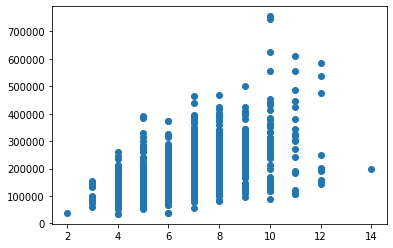

In [46]:
plt.scatter(x = 'TotRmsAbvGrd', y = 'SalePrice', data = df_train)

In [47]:
df_train.query('TotRmsAbvGrd == 14') # We will drop id 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


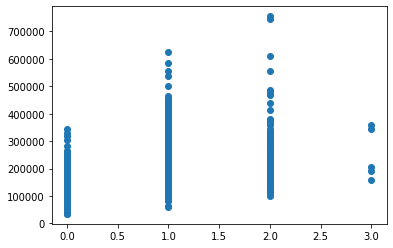

In [48]:
plt.scatter(x = 'Fireplaces', y = 'SalePrice', data = df_train)

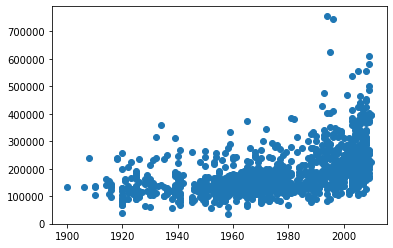

In [49]:
plt.scatter(x = 'GarageYrBlt', y = 'SalePrice', data = df_train)

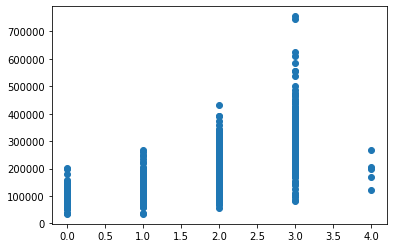

In [50]:
plt.scatter(x = 'GarageCars', y = 'SalePrice', data = df_train)

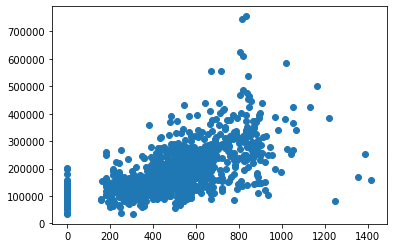

In [51]:
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = df_train)

In [52]:
df_train.query('GarageArea > 1200') # We will drop id 1062 and 1191

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


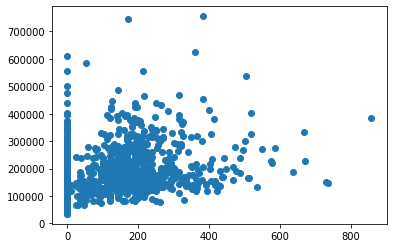

In [53]:
plt.scatter(x = 'WoodDeckSF', y = 'SalePrice', data = df_train)

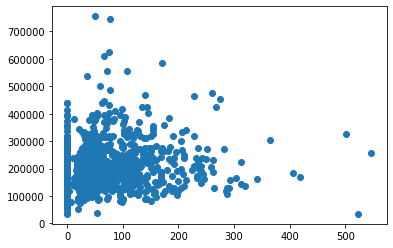

In [54]:
plt.scatter(x = 'OpenPorchSF', y = 'SalePrice', data = df_train)

In [55]:
df_train.query('OpenPorchSF > 500') # We will drop id 496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


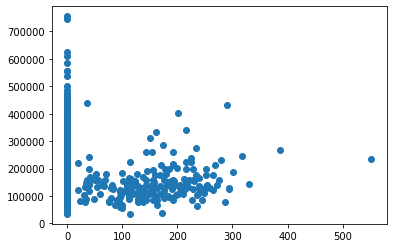

In [56]:
 plt.scatter(x = 'EnclosedPorch', y = 'SalePrice', data = df_train)

In [57]:
df_train.query('EnclosedPorch > 500') # We will drop id 198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


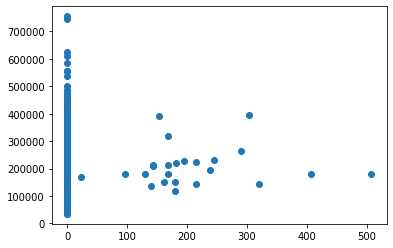

In [58]:
plt.scatter(x = '3SsnPorch', y = 'SalePrice', data = df_train)

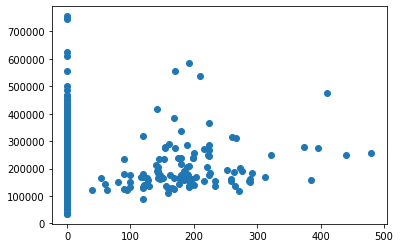

In [59]:
plt.scatter(x = 'ScreenPorch', y = 'SalePrice', data = df_train)

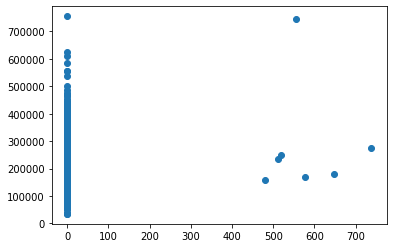

In [60]:
plt.scatter(x = 'PoolArea', y = 'SalePrice', data = df_train)

In [61]:
# Id we selected to drop
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186,
          441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]

In [62]:
# Updating the train dataset
df_train = df_train[df_train.Id.isin(values) == False]

In [63]:
# Checking null values
pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)).head(20)

,0
PoolQC,1435
MiscFeature,1388
Alley,1350
Fence,1162
FireplaceQu,684
LotFrontage,255
GarageYrBlt,76
GarageCond,76
GarageType,76
GarageFinish,76


In [64]:
# Checking feautres to impute
df_train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [65]:
df_train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [66]:
# Standarzing the Alley column
df_train['Alley'] = df_train['Alley'].fillna('No')
df_test['Alley'] = df_test['Alley'].fillna('No')

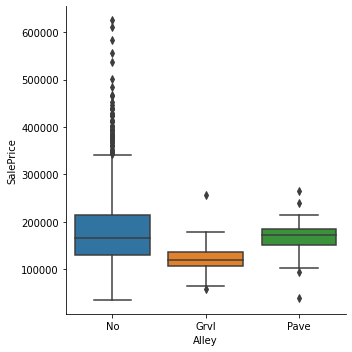

In [67]:
# Box Plot
sns.catplot(kind = 'box', x = 'Alley', y = 'SalePrice', data = df_train)

In [68]:
df_train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [69]:
df_train['Fence'] = df_train['Fence'].fillna('No')
df_test['Fence'] = df_test['Fence'].fillna('No')

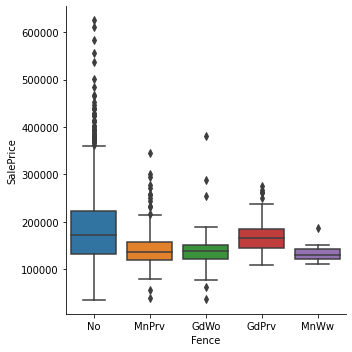

In [70]:
sns.catplot(kind = 'box', x = 'Fence', y = 'SalePrice', data = df_train)

In [71]:
df_train['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [72]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')

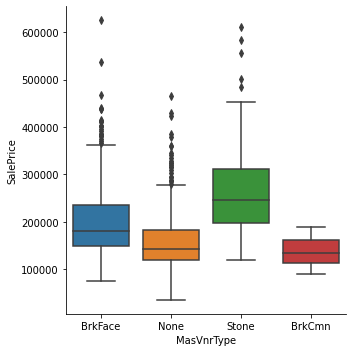

In [73]:
sns.catplot(kind = 'box', x = 'MasVnrType', y = 'SalePrice', data = df_train)

In [74]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)

In [75]:
df_train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [76]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('No')
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('No')

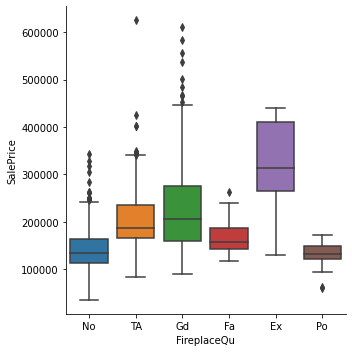

In [77]:
sns.catplot(kind = 'box', x = 'FireplaceQu', y = 'SalePrice', data = df_train)

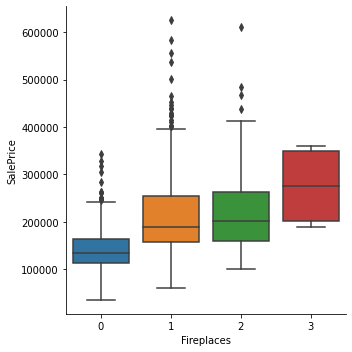

In [78]:
sns.catplot(kind = 'box', x = 'Fireplaces', y = 'SalePrice', data = df_train)

In [79]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(0)

In [80]:
# Checking correlation of garage built with house built year
df_train['GarageYrBlt'].corr(df_train['YearBuilt'])

0.8289827595060573

In [81]:
df_train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [82]:
df_train['GarageCond'] = df_train['GarageCond'].fillna('No')
df_test['GarageCond'] = df_test['GarageCond'].fillna('No')

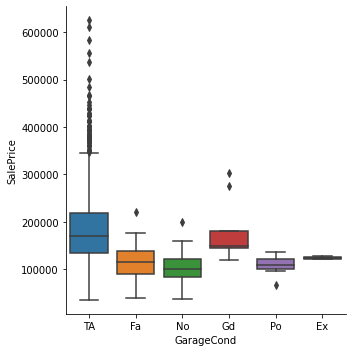

In [83]:
sns.catplot(kind = 'box', x = 'GarageCond', y = 'SalePrice', data = df_train)

In [84]:
df_train['GarageType'] = df_train['GarageType'].fillna('No')
df_test['GarageType'] = df_test['GarageType'].fillna('No')

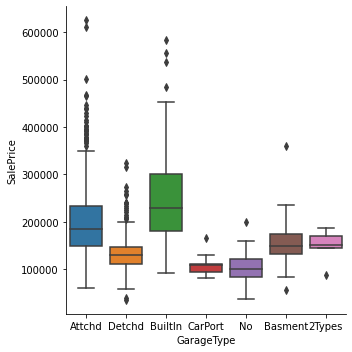

In [85]:
sns.catplot(kind = 'box', x = 'GarageType', y = 'SalePrice', data = df_train)

In [86]:
df_train['GarageFinish'] = df_train['GarageFinish'].fillna('No')
df_test['GarageFinish'] = df_test['GarageFinish'].fillna('No')

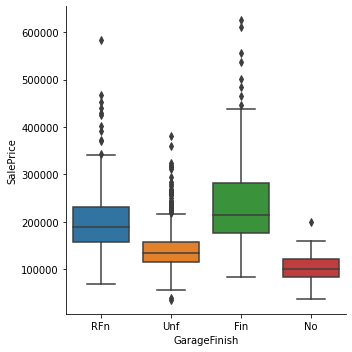

In [87]:
sns.catplot(kind = 'box', x = 'GarageFinish', y = 'SalePrice', data = df_train)

In [88]:
df_train['GarageQual'] = df_train['GarageQual'].fillna('No')
df_test['GarageQual'] = df_test['GarageQual'].fillna('No')

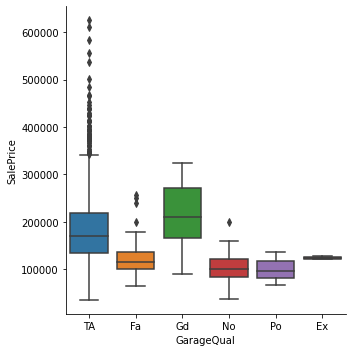

In [89]:
sns.catplot(kind = 'box', x = 'GarageQual', y = 'SalePrice', data = df_train)

In [90]:
df_train['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [91]:
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('Unf')
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna('Unf')

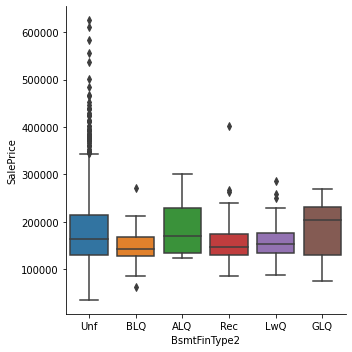

In [92]:
sns.catplot(kind = 'box', x = 'BsmtFinType2', y = 'SalePrice', data = df_train)

In [93]:
df_train['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [94]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('No')
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('No')

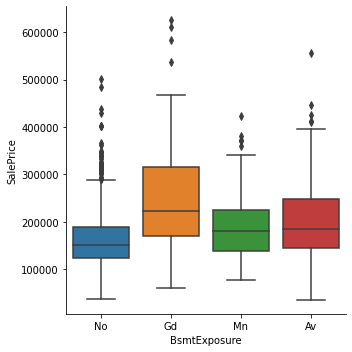

In [95]:
sns.catplot(kind = 'box', x = 'BsmtExposure', y = 'SalePrice', data = df_train)

In [96]:
df_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [97]:
df_train['BsmtQual'] = df_train['BsmtQual'].fillna('No')
df_test['BsmtQual'] = df_test['BsmtQual'].fillna('No')

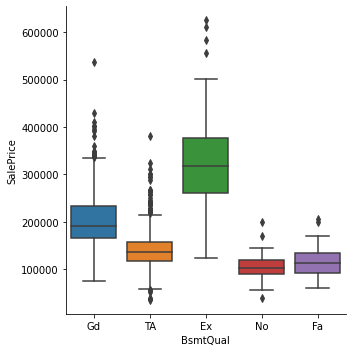

In [98]:
sns.catplot(kind = 'box', x = 'BsmtQual', y = 'SalePrice', data = df_train)

In [99]:
df_train['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [100]:
df_train['BsmtCond'] = df_train['BsmtCond'].fillna('No')
df_test['BsmtCond'] = df_test['BsmtCond'].fillna('No')

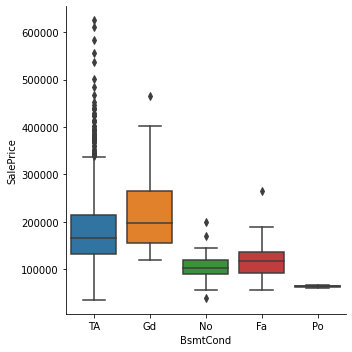

In [101]:
sns.catplot(kind = 'box', x = 'BsmtCond', y = 'SalePrice', data = df_train)

In [102]:
df_train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [103]:
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('Unf')
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna('Unf')

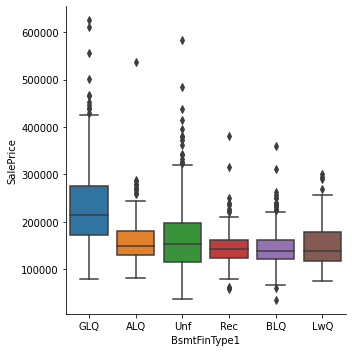

In [104]:
sns.catplot(kind = 'box', x = 'BsmtFinType1', y = 'SalePrice', data = df_train)

In [105]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)

In [106]:
df_train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [107]:
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')
df_test['Electrical'] = df_test['Electrical'].fillna('SBrkr')

In [108]:
# Dropping Unwanted Columns
df_train = df_train.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
df_test = df_test.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

In [109]:
# Feature Engineering
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearBuilt']
df_test['HouseAge'] = df_test['YrSold'] - df_test['YearBuilt']

In [110]:
df_train['HouseRemodelAge'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_test['HouseRemodelAge'] = df_test['YrSold'] - df_test['YearRemodAdd']

In [111]:
df_train['TotalSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['BsmtFinSF1'] + df_train['BsmtFinSF2']
df_test['TotalSF'] = df_test['1stFlrSF'] + df_test['2ndFlrSF'] + df_test['BsmtFinSF1'] + df_test['BsmtFinSF2']

In [112]:
df_train['TotalArea'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']
df_test['TotalArea'] = df_test['GrLivArea'] + df_test['TotalBsmtSF']

In [113]:
df_train['TotalBaths'] = df_train['BsmtFullBath'] + df_train['FullBath'] + \
                        0.5 * (df_train['BsmtHalfBath'] + df_train['HalfBath'])

df_test['TotalBaths'] = df_test['BsmtFullBath'] + df_test['FullBath'] + \
                        0.5 * (df_test['BsmtHalfBath'] + df_test['HalfBath'])

In [114]:
df_train['TotalPorchSF'] = df_train['OpenPorchSF'] + df_train['3SsnPorch'] + df_train['EnclosedPorch'] + \
                            + df_train['ScreenPorch'] + df_train['WoodDeckSF']
    
df_test['TotalPorchSF'] = df_test['OpenPorchSF'] + df_test['3SsnPorch'] + df_test['EnclosedPorch'] + \
                            + df_test['ScreenPorch'] + df_test['WoodDeckSF']

In [115]:
# Dropping the columns used in making new features
df_train = df_train.drop(columns = ['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
                                    'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath',
                                    'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch',
                                    'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

df_test = df_test.drop(columns = ['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
                                    'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath',
                                    'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch',
                                    'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

<AxesSubplot: >

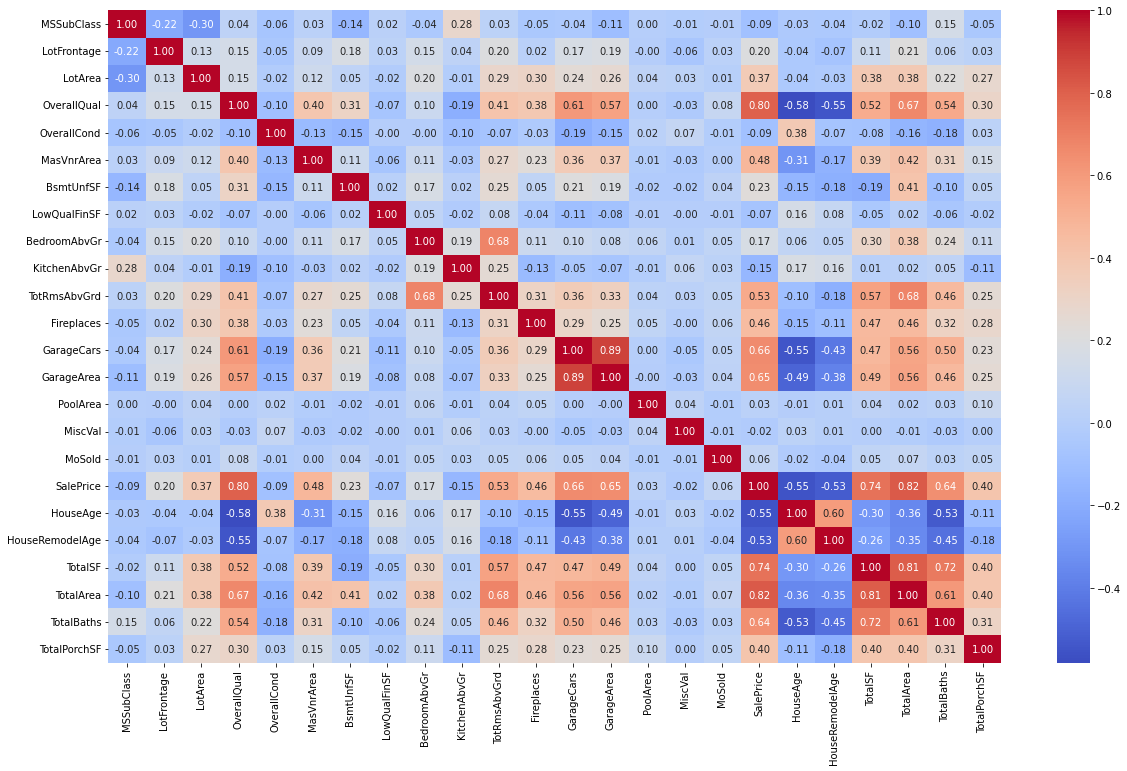

In [116]:
# Correlation Matrix / HeatMap
corr_matrix = df_train.corr()
plt.figure(figsize = (20,12))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

In [117]:
# We will drop GarageArea
df_train = df_train.drop(columns = ['GarageArea'])
df_test = df_test.drop(columns = ['GarageArea'])

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

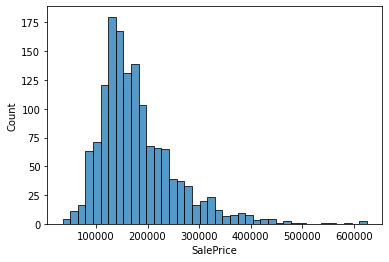

In [118]:
# Histogram
sns.histplot(x = 'SalePrice', data = df_train)

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

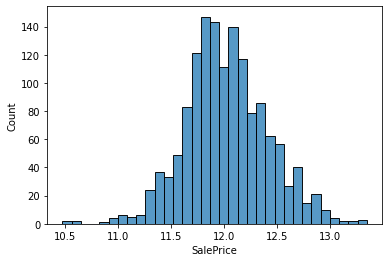

In [119]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
sns.histplot(x = 'SalePrice', data = df_train)

In [120]:
# Before creating pipeline, checking columns that have categorical data
df_train.dtypes[df_train.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [121]:
df_train.dtypes[df_train.dtypes != 'object']

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
HouseAge             int64
HouseRemodelAge      int64
TotalSF              int64
TotalArea            int64
TotalBaths         float64
TotalPorchSF         int64
dtype: object

In [122]:
# Columns to do Ordinal Encoder
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',
            'CentralAir',  'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive',
            'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC', 'ExterQual', 'BsmtCond']

In [123]:
# Columns to do One-Hot Encoder
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
            'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical',
            'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [124]:
num_cols = df_train.select_dtypes(include = ['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [125]:
# Creating Pipelines
num_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

In [126]:
ode_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1))
])

In [127]:
ohe_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

In [128]:
# Using column transformer to put all the pipelines together
col_trans = ColumnTransformer(transformers = [
    ('num_pipeline', num_pipeline, num_cols),
    ('ode_pipeline', ode_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols)
    ],
    remainder = 'passthrough',
    n_jobs = -1
)

In [129]:
# Combining the pipelines
pipeline = Pipeline(steps = [
    ('preprocessing', col_trans)
])

In [130]:
# Making the Independent Variable(X) and Dependent Variable(y)
X = df_train.drop('SalePrice', axis = 1)
y = df_train['SalePrice']

In [131]:
X_preprocessed = pipeline.fit_transform(X)

In [132]:
# Splitting the X and y variable into train dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size = 0.2, random_state = 25)

In [138]:
# Builind models
# Linear Regression
lr = LinearRegression()

In [139]:
lr.fit(X_train, y_train)

LinearRegression()

In [140]:
lr_y_pred = lr.predict(X_test)

In [141]:
mean_squared_error(y_test, lr_y_pred)

3.3430334662728147e+19

In [142]:
# Random Forest Regressor
rfr = RandomForestRegressor(random_state = 13)

In [144]:
rfr_param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [145]:
rfr_cv = GridSearchCV(rfr, rfr_param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [146]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [149]:
np.sqrt(-1 * rfr_cv.best_score_)

0.1339531434811936

In [150]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}

In [151]:
# XGBRegressor
xgb = XGBRegressor(random_state = 13)

In [152]:
xgb_param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [153]:
xgb_cv = GridSearchCV(xgb, xgb_param_grid, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [154]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [155]:
np.sqrt(-1 * xgb_cv.best_score_)

0.11788482845739556

In [156]:
# Ridge
ridge = Ridge()

In [157]:
ridge_param_grid = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [158]:
ridge_cv = GridSearchCV(ridge, ridge_param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [159]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [161]:
np.sqrt(-1 * ridge_cv.best_score_)

0.10909691388621942

In [133]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

In [134]:
gbr_param_grid = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

In [135]:
gbr_cv = GridSearchCV(gbr, gbr_param_grid, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [136]:
gbr_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [137]:
np.sqrt(-1 * gbr_cv.best_score_)

0.11682445086990305

In [138]:
# Lightgbm Regressor
lgbmr = lgb.LGBMRegressor()

In [141]:
lgbmr_param_grid = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [142]:
lgbmr_cv = GridSearchCV(lgbmr, lgbmr_param_grid, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [143]:
lgbmr_cv.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1994
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 112
[LightGBM] [Info] Start training from score 12.023259


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [144]:
np.sqrt(-1 * lgbmr_cv.best_score_)

0.12728980697034

In [137]:
# Cat Boost Regressor
catboost = CatBoostRegressor(loss_function = 'RMSE', verbose = False)

In [138]:
catboost_param_grid = {
    'iterations': [100, 500],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [139]:
catboost_cv = GridSearchCV(catboost, catboost_param_grid, cv = 2, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [ ]:
catboost_cv.fit(X_train, y_train)

In [ ]:
np.sqrt(-1 * catboost_cv.best_score_)

In [160]:
# Voting Regressor
vr = VotingRegressor([
    ('gbr', gbr_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('ridge', ridge_cv.best_estimator_)],
    weights = [2, 3, 1])

In [161]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=12,
                                                       max_features=0.1,
                                                       min_samples_leaf=10,
                                                       n_estimators=1000)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.9, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_m...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=2,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None, ...)),
                            ('ridge', Ridge(alpha=10, solver='lsqr'))],
                weights=[2, 3, 1])

In [162]:
vr_y_pred = vr.predict(X_test)

In [164]:
mean_squared_error(y_test, vr_y_pred, squared = False)

0.11912792371466563

In [ ]:
# Stacking Regressor
estimators = [
    ('gbr', gbr_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', catboost_cv.best_estimator_),
    ('lgbmr', lgb_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [ ]:
stackReg = StackingRegressor(
    estimators = estimators
    final_estimator = vr
)

In [ ]:
stackReg.fit(X_train, y_train)

In [ ]:
stackReg_y_pred = stackReg.predict(X_test)

In [ ]:
mean_squared_error(y_test, stackReg_y_pred, squared = False)